# Data Science - Team 15 (Group 4 INT-A)

# Iteration 3

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score

## 1. Data Understanding

### 1.1 Analyzing and merging datasets

In [6]:
df1 = pd.read_csv('set15_it2_final.csv')

In [7]:
df2 = pd.read_csv('set15_it3.csv')

In [8]:
df1

,Unnamed: 0,DI,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize (sqft),StructuralIntegrity,ExteriorCharm,MonthlyPayment,AffordableDwelling,Prediction
0,0,0,149500.0,Meadowlands,Dragonspire,1157.0,12160.0,4,Common,570.988693,True,1
1,1,1,105000.0,GnomeBurough,Petalbridge,772.0,3960.0,8,Common,401.028848,True,1
2,2,2,79275.0,Meadowlands,Shadowmere,664.0,8172.0,5,Common,302.776780,True,1
3,3,3,140000.0,Meadowlands,Emberfall,1231.0,13825.0,6,Common,534.705131,True,1
4,4,4,150909.0,GnomeBurough,Mystvale,1406.0,9060.0,6,Common,576.370119,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2333,2333,2335,184500.0,Meadowlands,Duskwood,1056.0,13300.0,5,Gleaming,704.664976,True,1
2334,2334,2336,210000.0,Meadowlands,Nighthaven,1594.0,13175.0,5,Common,802.057696,False,1
2335,2335,2337,223500.0,Meadowlands,Stormwatch,1212.0,21384.0,5,Common,853.618548,False,1
2336,2336,2338,129900.0,Meadowlands,Dragonspire,627.0,7100.0,6,Common,496.129975,True,1


In [9]:
df2

,DI,Craftsmanship,EraConstructed
0,0,6,1201
1,1,7,1112
2,2,4,1338
3,3,5,1212
4,4,5,1042
...,...,...,...
2358,2335,7,1651
2359,2336,6,1519
2360,2337,5,1142
2361,2338,5,1257


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   DI              2363 non-null   int64
 1   Craftsmanship   2363 non-null   int64
 2   EraConstructed  2363 non-null   int64
dtypes: int64(3)
memory usage: 55.5 KB


In [11]:
df2.describe()

,DI,Craftsmanship,EraConstructed
count,2363.000000,2363.000000,2363.000000
mean,1169.813796,6.123572,1409.574270
std,675.447687,1.409403,231.862362
min,0.000000,1.000000,887.000000
25%,584.500000,5.000000,1225.500000
50%,1170.000000,6.000000,1396.000000
75%,1753.500000,7.000000,1617.500000
max,2339.000000,10.000000,1799.000000


In [12]:
df2.sample(5)

,DI,Craftsmanship,EraConstructed
1187,1176,5,1355
2299,2277,9,1709
1984,1964,5,1318
2203,2182,6,1789
624,617,6,1575


In [13]:
df = df1.merge(df2, left_index=True, right_index=True, how="left")

In [14]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [15]:
df.drop(columns=['DI_y'], inplace=True)

In [16]:
df.rename(columns={'DI_x' : 'DI'}, inplace=True)

In [17]:
df.sample(5)

,DI,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize (sqft),StructuralIntegrity,ExteriorCharm,MonthlyPayment,AffordableDwelling,Prediction,Craftsmanship,EraConstructed
259,259,146000.0,Meadowlands,Dragonspire,884.0,7000.0,6,Common,557.621065,True,1,6,1332
1126,1128,65000.0,ArcaneMarket,Mystvale,664.0,9000.0,5,Gleaming,248.255954,True,1,8,1797
2262,2264,241000.0,AetherIsles,Wyverncliff,1192.0,8125.0,5,Gleaming,920.456690,False,0,8,1796
2204,2206,109900.0,Meadowlands,Shadowmere,955.0,17808.0,5,Common,419.743528,True,1,6,1587
903,904,144000.0,CitadelQuarter,Brightforge,1553.0,8400.0,5,Common,549.982420,True,1,6,1247


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2338 entries, 0 to 2337
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DI                   2338 non-null   int64  
 1   TradeValue           2338 non-null   float64
 2   RealmType            2338 non-null   object 
 3   Enclave              2338 non-null   object 
 4   LivingQuarters       2338 non-null   float64
 5   ParcelSize (sqft)    2338 non-null   float64
 6   StructuralIntegrity  2338 non-null   int64  
 7   ExteriorCharm        2338 non-null   object 
 8   MonthlyPayment       2338 non-null   float64
 9   AffordableDwelling   2338 non-null   bool   
 10  Prediction           2338 non-null   int64  
 11  Craftsmanship        2338 non-null   int64  
 12  EraConstructed       2338 non-null   int64  
dtypes: bool(1), float64(4), int64(5), object(3)
memory usage: 221.6+ KB


In [19]:
df.describe()

,DI,TradeValue,LivingQuarters,ParcelSize (sqft),StructuralIntegrity,MonthlyPayment,Prediction,Craftsmanship,EraConstructed
count,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000
mean,1169.760479,181527.821215,1152.836612,10046.660674,5.564585,693.313267,0.800257,6.117194,1408.452951
std,675.842382,80164.061659,377.971615,7126.006466,1.105235,306.172393,0.399893,1.410561,231.366301
min,0.000000,12789.000000,256.000000,1470.000000,1.000000,48.845314,0.000000,1.000000,887.000000
25%,584.250000,129925.000000,883.000000,7427.750000,5.000000,496.225458,1.000000,5.000000,1224.250000
50%,1170.500000,160350.000000,1115.000000,9375.000000,5.000000,612.428341,1.000000,6.000000,1394.500000
75%,1754.750000,213000.000000,1326.000000,11509.000000,6.000000,813.515663,1.000000,7.000000,1613.000000
max,2339.000000,625000.000000,4339.000000,164660.000000,9.000000,2387.076477,1.000000,10.000000,1799.000000


### 1.2 Checking for data quality issues

In [21]:
df.isna().sum()

DI                     0
TradeValue             0
RealmType              0
Enclave                0
LivingQuarters         0
ParcelSize (sqft)      0
StructuralIntegrity    0
ExteriorCharm          0
MonthlyPayment         0
AffordableDwelling     0
Prediction             0
Craftsmanship          0
EraConstructed         0
dtype: int64

No null values

In [23]:
df.duplicated().sum()

0

no duplicated values either

In [25]:
df['Craftsmanship'].unique()

array([ 6,  7,  4,  5,  8,  9,  2,  3, 10,  1], dtype=int64)

In [26]:
df['EraConstructed'].unique()

array([1201, 1112, 1338, 1212, 1042, 1416, 1629, 1085, 1666, 1311, 1465,
       1649, 1077, 1433, 1295, 1663, 1188, 1319, 1609, 1617, 1176, 1496,
       1125, 1342, 1437, 1785, 1671, 1547, 1101, 1303, 1058, 1501, 1356,
       1537, 1002, 1367, 1406, 1632, 1705, 1667, 1471, 1291, 1360, 1363,
       1142, 1082, 1676, 1745, 1014, 1488, 1681, 1131, 1161, 1725, 1283,
       1425, 1023, 1296, 1492, 1272, 1287, 1289, 1490, 1735, 1271, 1025,
       1239, 1327, 1566, 1402, 1708, 1794, 1689, 1247, 1563, 1602, 1518,
       1684, 1276, 1664, 1380, 1599, 1046, 1752, 1177, 1094, 1073, 1008,
       1121, 1470, 1267, 1314, 1499, 1588, 1774, 1345, 1710, 1152, 1383,
       1385, 1232, 1509, 1782, 1362, 1028, 1423, 1278, 1581, 1249, 1330,
       1241, 1696, 1678, 1378, 1619, 1116, 1736, 1640, 1213, 1315, 1679,
       1244, 1631, 1193, 1093, 1209, 1698, 1013, 1539, 1763, 1559, 1237,
       1038, 1184, 1624, 1251, 1699, 1576, 1427, 1729, 1123, 1238, 1552,
       1343, 1536, 1130, 1308, 1149, 1182, 1525, 12

In [27]:
df['EraConstructed'].value_counts()

EraConstructed
1313    11
1221     9
1271     9
1285     9
1316     9
        ..
1392     1
1615     1
1715     1
1412     1
1528     1
Name: count, Length: 768, dtype: int64

In [28]:
df.corr(numeric_only=True, method='spearman')

,DI,TradeValue,LivingQuarters,ParcelSize (sqft),StructuralIntegrity,MonthlyPayment,AffordableDwelling,Prediction,Craftsmanship,EraConstructed
DI,1.000000,0.013785,0.016703,0.013009,-0.021555,0.013785,-0.040606,0.000938,0.013392,0.020573
TradeValue,0.013785,1.000000,0.697628,0.440014,-0.059355,1.000000,-0.797740,-0.510217,0.027912,0.024597
LivingQuarters,0.016703,0.697628,1.000000,0.408991,-0.054155,0.697628,-0.589261,-0.333269,0.008483,0.004599
ParcelSize (sqft),0.013009,0.440014,0.408991,1.000000,-0.074976,0.440014,-0.343380,-0.120639,0.014757,0.025751
StructuralIntegrity,-0.021555,-0.059355,-0.054155,-0.074976,1.000000,-0.059355,0.065029,0.040138,-0.189587,-0.400195
MonthlyPayment,0.013785,1.000000,0.697628,0.440014,-0.059355,1.000000,-0.797740,-0.510217,0.027912,0.024597
AffordableDwelling,-0.040606,-0.797740,-0.589261,-0.343380,0.065029,-0.797740,1.000000,0.516546,-0.038127,-0.025049
Prediction,0.000938,-0.510217,-0.333269,-0.120639,0.040138,-0.510217,0.516546,1.000000,-0.021416,-0.008871
Craftsmanship,0.013392,0.027912,0.008483,0.014757,-0.189587,0.027912,-0.038127,-0.021416,1.000000,0.632541
EraConstructed,0.020573,0.024597,0.004599,0.025751,-0.400195,0.024597,-0.025049,-0.008871,0.632541,1.000000


### 1.3 Graphs

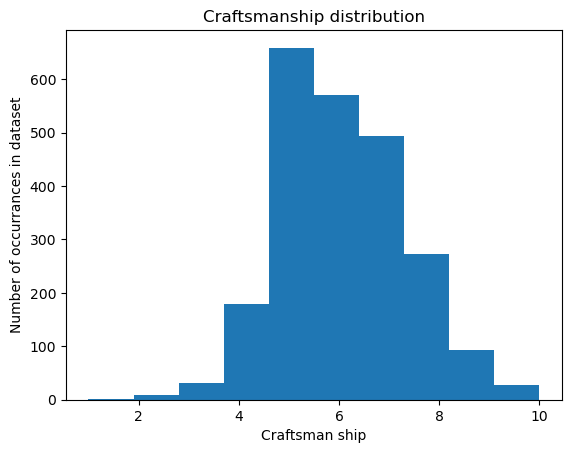

In [30]:
plt.hist(df["Craftsmanship"], bins=10)
plt.title('Craftsmanship distribution')
plt.xlabel('Craftsman ship')
plt.ylabel('Number of occurrances in dataset')
plt.show()

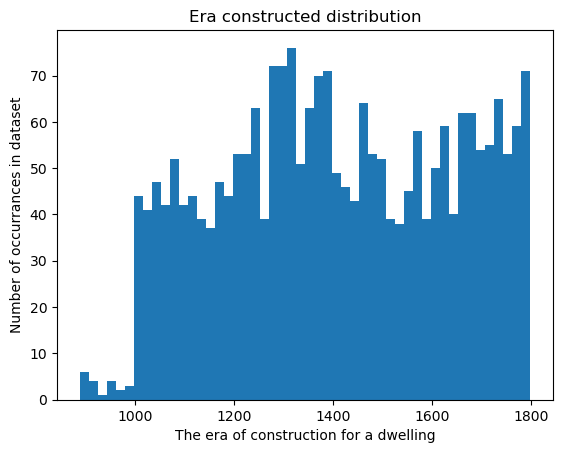

In [31]:
plt.hist(df["EraConstructed"], bins=50)
plt.title('Era constructed distribution')
plt.xlabel('The era of construction for a dwelling')
plt.ylabel('Number of occurrances in dataset')
plt.show()

<Axes: >

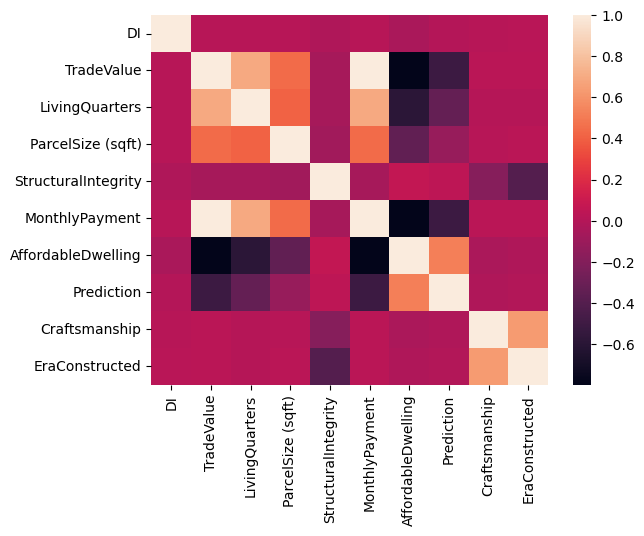

In [32]:
sns.heatmap(df.corr(numeric_only=True, method='spearman'))

### Pairplots saved as pngs

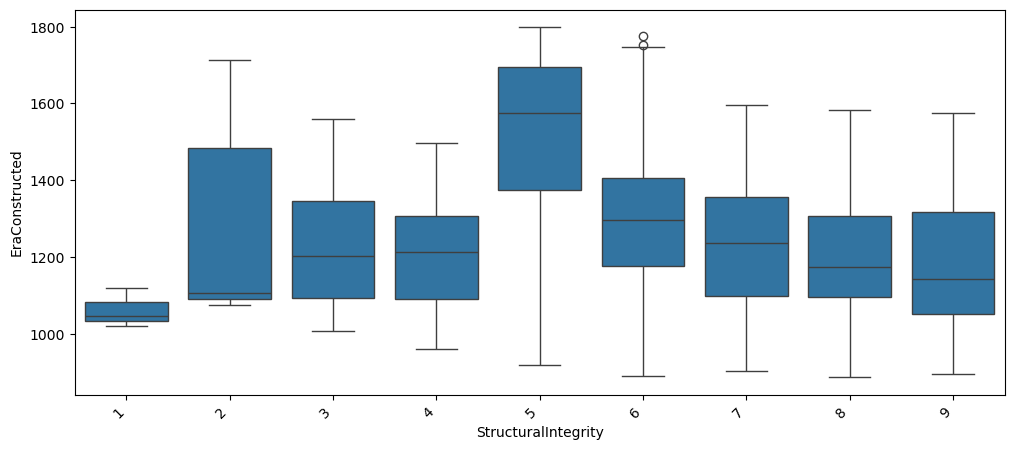

In [34]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x="StructuralIntegrity", y="EraConstructed")
plt.xticks(ha='right', rotation=45)
plt.show()

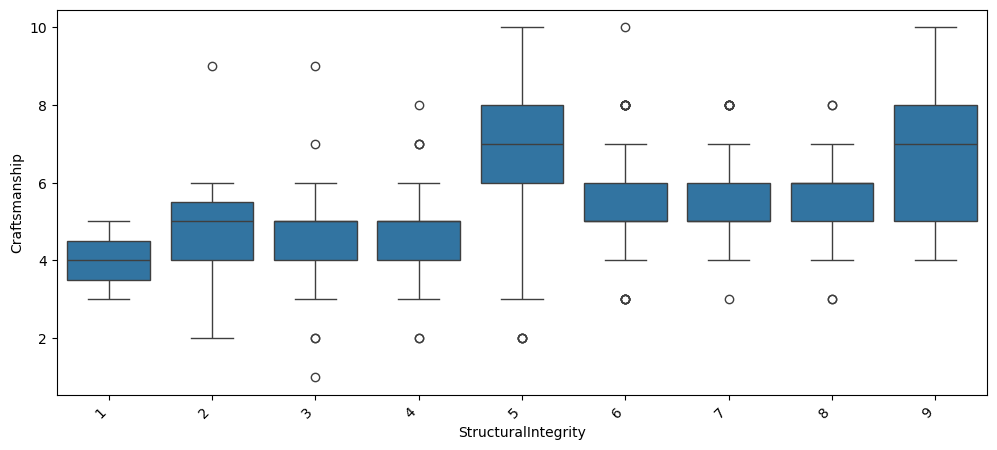

In [35]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x="StructuralIntegrity", y="Craftsmanship")
plt.xticks(ha='right', rotation=45)
plt.show()

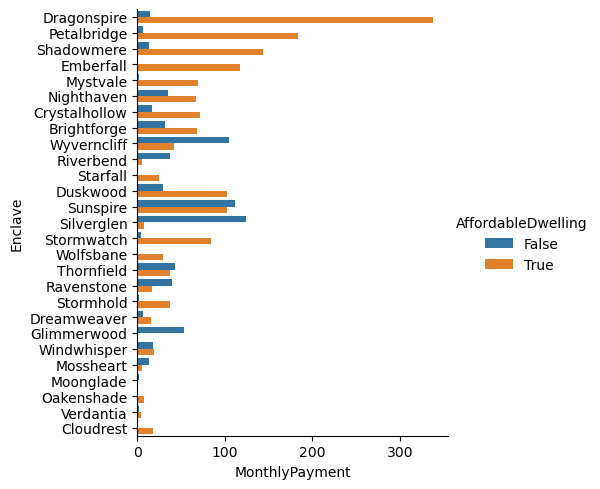

In [36]:
sns.catplot(data=df, kind="bar", x="MonthlyPayment", y="Enclave", 
            hue="AffordableDwelling", errorbar=None, estimator='count')

## 2. Data Preparation

In [38]:
def needs_renovation(row):
    if (row['EraConstructed'] < 1300):
        if (row['StructuralIntegrity'] <= 6):
            return True
        else:
            return False
    else:
        return False

df['NeedsRestoration'] = df.apply(needs_renovation, axis=1)

In [39]:
df.sample(5)

,DI,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize (sqft),StructuralIntegrity,ExteriorCharm,MonthlyPayment,AffordableDwelling,Prediction,Craftsmanship,EraConstructed,NeedsRestoration
245,245,175000.0,Meadowlands,Dragonspire,1300.0,9900.0,6,Common,668.381414,True,1,3,1069,True
2180,2182,143000.0,GnomeBurough,Petalbridge,871.0,9836.0,5,Common,546.163098,True,1,5,1258,True
1844,1846,120000.0,Meadowlands,Sunspire,676.0,9675.0,5,Gleaming,458.318684,True,1,8,1726,False
1140,1142,179000.0,Meadowlands,Shadowmere,923.0,10800.0,5,Common,683.658703,True,1,5,1088,True
146,146,227000.0,Meadowlands,Nighthaven,1280.0,8400.0,5,Common,866.986177,False,1,6,1013,True


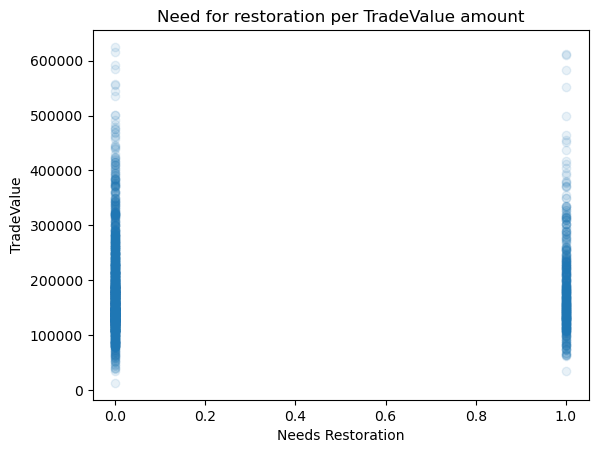

In [40]:
plt.scatter(df['NeedsRestoration'], df['TradeValue'], alpha=0.1)
plt.title('Need for restoration per TradeValue amount')
plt.xlabel('Needs Restoration')
plt.ylabel('TradeValue')
plt.show()

The properties in need of restoration don't have more density towards lower values, but simply have less data points

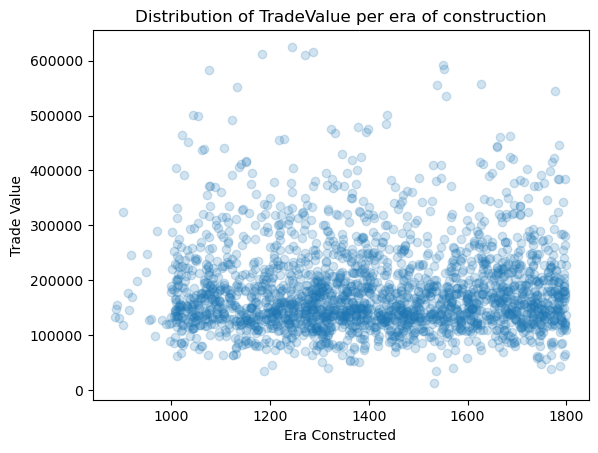

In [42]:
plt.scatter(df['EraConstructed'], df['TradeValue'], alpha=0.2)
plt.title('Distribution of TradeValue per era of construction')
plt.xlabel('Era Constructed')
plt.ylabel('Trade Value')
plt.show()

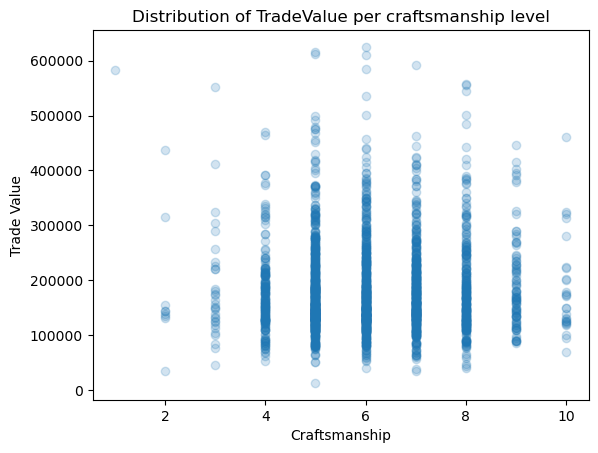

In [43]:
plt.scatter(df['Craftsmanship'], df['TradeValue'], alpha=0.2)
plt.title('Distribution of TradeValue per craftsmanship level')
plt.xlabel('Craftsmanship')
plt.ylabel('Trade Value')
plt.show()

This one also seems to match the craftsmanship histogram for the most part, though appears to have an outlier at the first level of craftsmanship

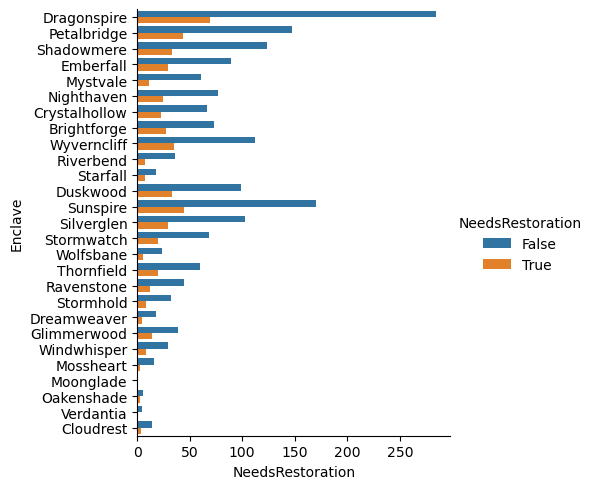

In [45]:
sns.catplot(data=df, kind="bar", x="NeedsRestoration", y="Enclave", 
            hue="NeedsRestoration", errorbar=None, estimator='count')

All enclaves appear to have a (mostly) similar proportion of properties needing and not needing renovations, meaning this metric might not be best to use later on for the decision tree

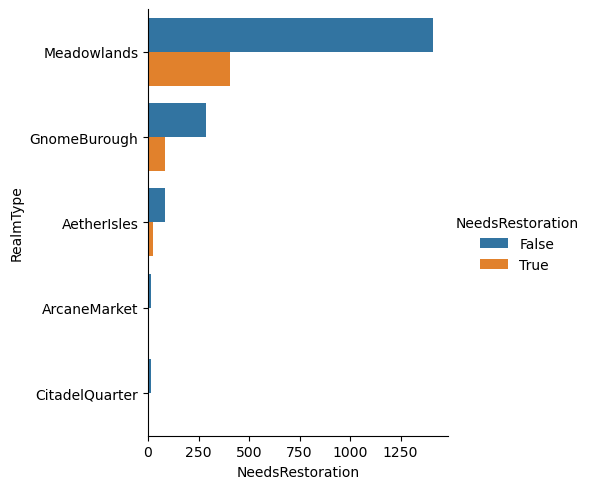

In [47]:
sns.catplot(data=df, kind="bar", x="NeedsRestoration", y="RealmType", 
            hue="NeedsRestoration", errorbar=None, estimator='count')

Same thing as above with the Enclaves, these all seem quite proportional and wouldn't make a great predictor on a decision tree

<Axes: >

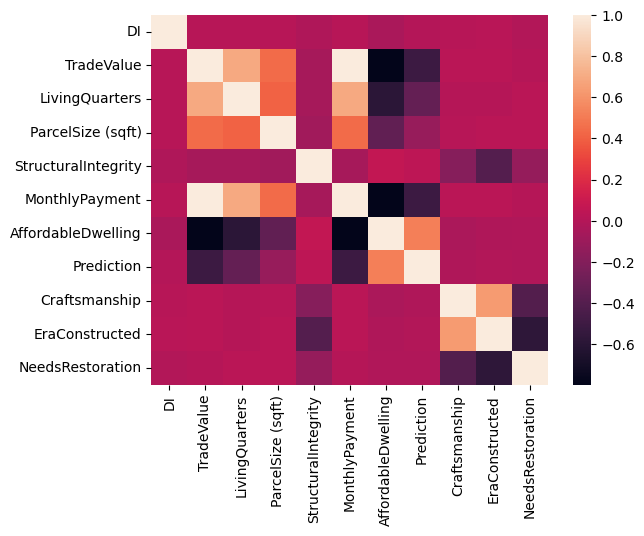

In [49]:
sns.heatmap(df.corr(numeric_only=True, method='spearman'))

Ignoring the columns formed from another (AffordableDwelling and MonthlyPayment when trying to predict TradeValue), from the heatmap we can determine that the new columns for the iteration 3 data set don't seem to have any correlation with TradeValue, so the best picks for the linear regression model are still ParcelSize and LivingQuarters just like in iteration 1.

As for the decision tree, EraConstructed and StructuralIntegrity are, of course, what derives NeedsRestoration, so these would also be invalid choices. Enclaves and RealmType also don't seem to be very good predictors for if a property needs renovation or not either, but with sklearn's decision tree function, maybe we can get a better insight into this while trying to avoid overfitting. The best and most obvious option is using Craftsmanship.

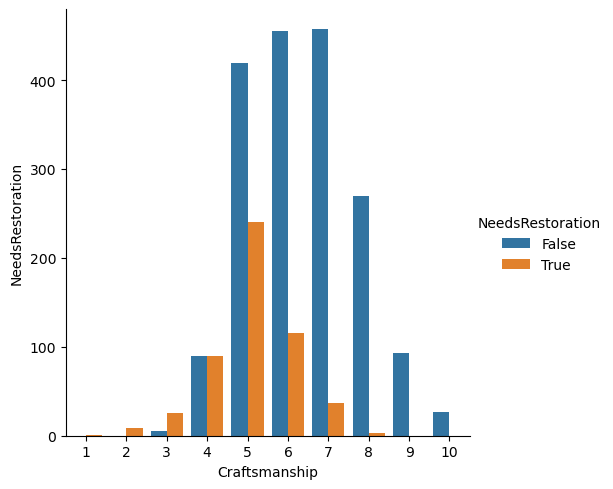

In [51]:
sns.catplot(data=df, kind="bar", x="Craftsmanship", y="NeedsRestoration", 
            hue="NeedsRestoration", errorbar=None, estimator='count')

From the graph we can already imagine some decision nodes for the tree, for example, everything below 4 Craftsmanship being classified as needing renovation.

### For pairplots check the two pngs

## 3. Moddeling

### TradeValue

In [56]:
features = df[['LivingQuarters', 'ParcelSize (sqft)']]

target = df['TradeValue']

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.30, random_state=3)

In [57]:
model = LinearRegression()

In [58]:
model = model.fit(features_train, target_train)

In [59]:
target_pred = model.predict(features_test)

### NeedsRestoration

In [61]:
features = df[['Craftsmanship', 'TradeValue']]

target = df['NeedsRestoration']

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.30, random_state=3)

Since we need more than one feature, we chose TradeValue pretty arbitrarily since it shouldn't affect the results of the tree, which will rely more heavily on Craftsmanship, the one with an actual correlation with the target

In [63]:
tree = DecisionTreeClassifier(max_depth=2)

In [64]:
tree = tree.fit(features_train, target_train)

In [93]:
target_prediction = tree.predict(features_test)

## 4. Evaluation

### 4.1 Linear Regression Model: TradeValue

In [99]:
print('Mean Absolute Error:', mean_absolute_error(target_test, target_pred))

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [122]:
# Calculate and print MSE.
mse = mean_squared_error(target_test, target_pred)
print(f"Mean squared error:", mse)


# Calculate and print RMSE.
rmse = mse ** 0.5
print(f"Root mean squared error:", rmse)

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

In [118]:
r2 = r2_score(target_test, target_pred)
print(f"R-squared:", r2)

R-squared: -0.1585872497353653


### 4.2 Classification Model: NeedsRestoration

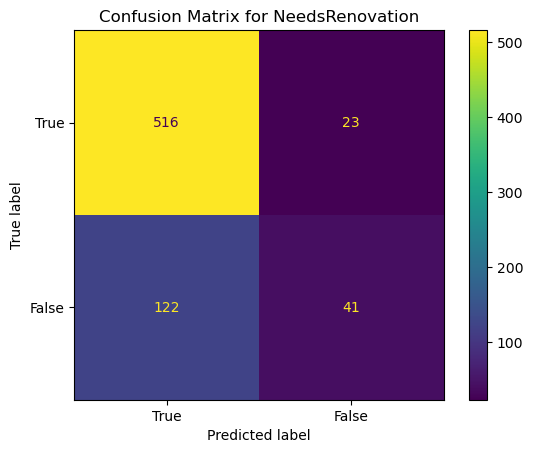

In [114]:
cm = confusion_matrix(target_test, target_prediction)
labels = ['True','False']
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.title('Confusion Matrix for NeedsRenovation')
plt.show()

In [116]:
print('Accuracy:', accuracy_score(target_test, target_prediction))

Accuracy: 0.7934472934472935


This converts the final dataset results into a csv file.

In [ ]:
df.to_csv('set15_it3_final.csv')